In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
description_df = pd.read_excel('LCDataDictionary.xlsx')

In [3]:
description_df.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [4]:
# Reading the raw data provided by Lending Club
df = pd.read_csv("loan.csv")

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [6]:
df.shape

(2260668, 145)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [8]:
# Calculate population proportions
population_counts = df['loan_status'].value_counts()
population_proportions = population_counts / population_counts.sum()

print(population_proportions)


loan_status
Fully Paid                                             0.460904
Current                                                0.406824
Charged Off                                            0.115742
Late (31-120 days)                                     0.009686
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001653
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: count, dtype: float64


In [9]:
# Adjust sample size for each class
target_size = 300000  # Desired total sample size

# Calculate the number of samples for each class based on population proportions
sample_sizes = (population_proportions * target_size).astype(int)

# Perform stratified sampling for each class
samples = []
for status, count in sample_sizes.items():
    samples.append(df[df['loan_status'] == status].sample(n=count, random_state=42))

# Combine the samples
loan_representative = pd.concat(samples)

# Shuffle the final dataset
loan_representative = loan_representative.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the class distribution
print(loan_representative['loan_status'].value_counts(normalize=True))

loan_status
Fully Paid                                             0.460913
Current                                                0.406831
Charged Off                                            0.115742
Late (31-120 days)                                     0.009684
In Grace Period                                        0.003957
Late (16-30 days)                                      0.001650
Does not meet the credit policy. Status:Fully Paid     0.000877
Does not meet the credit policy. Status:Charged Off    0.000333
Default                                                0.000013
Name: proportion, dtype: float64


In [10]:
from scipy.stats import chisquare

# Observed counts in the new sample
sample_counts = loan_representative['loan_status'].value_counts()

# Expected counts in the sample based on population proportions
expected_counts = population_proportions * len(loan_representative)

# Perform Chi-Square Goodness-of-Fit Test
chi_square_stat, p_value = chisquare(f_obs=sample_counts, f_exp=expected_counts)

print(f"Chi-Square Statistic: {chi_square_stat}")
print(f"P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Sample is still not representative of the population.")
else:
    print("Sample is now representative of the population.")


Chi-Square Statistic: 0.01794205665173798
P-Value: 0.9999999997320577
Sample is now representative of the population.


In [11]:
loan = loan_representative[(loan_representative.loan_status== 'Charged Off')|(loan_representative.loan_status== 'Fully Paid')]

In [12]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,NaN,NaN,10000,10000,10000.0,60 months,7.49,200.34,A,A4,Senior Director of Digital Strategy,< 1 year,RENT,150000.0,Source Verified,Jan-2015,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,902xx,CA,7.32,4.0,Feb-2002,0.0,14.0,NaN,9.0,0.0,11883,48.3,22.0,w,0.0,0.0,11241.522122,11241.52,10000.00,1226.52,15.00,0.0,0.0,Jan-2017,7042.70,NaN,Jan-2017,0.0,14.0,1,Individual,NaN,NaN,NaN,0.0,0.0,57867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24600.0,NaN,NaN,NaN,0.0,7233.0,12717.0,48.3,0.0,0.0,117.0,155.0,28.0,28.0,0.0,28.0,16.0,NaN,14.0,1.0,2.0,2.0,4.0,6.0,12.0,5.0,9.0,2.0,9.0,0.0,0.0,1.0,0.0,75.0,0.0,0.0,0.0,92242.0,57867.0,24600.0,63670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,36 months,5.32,752.87,A,A1,NaN,NaN,MORTGAGE,100000.0,Not Verified,Mar-2016,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,082xx,NJ,15.23,1.0,Sep-1996,0.0,20.0,NaN,14.0,0.0,25508,33.7,28.0,w,0.0,0.0,26541.646195,26541.65,25000.00,1541.65,0.00,0.0,0.0,Aug-2017,14503.12,NaN,Sep-2017,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,337178.0,0.0,2.0,1.0,1.0,10.0,26298.0,66.0,1.0,5.0,15403.0,45.0,75700.0,0.0,1.0,1.0,6.0,24084.0,46092.0,35.6,0.0,0.0,141.0,234.0,7.0,7.0,5.0,13.0,20.0,10.0,20.0,0.0,4.0,4.0,9.0,11.0,8.0,11.0,15.0,4.0,14.0,0.0,0.0,0.0,2.0,92.9,0.0,0.0,0.0,416802.0,51806.0,71600.0,39649.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,34025,34025,34025.0,60 months,18.55,874.23,E,E2,Director TechOps,10+ years,OWN,204000.0,Verified,Sep-2015,Charged Off,n,NaN,NaN,debt_

In [13]:
loan.shape

(172993, 145)

In [14]:
loan['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid     0.799287
Charged Off    0.200713
Name: proportion, dtype: float64

In [15]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,NaN,NaN,10000,10000,10000.0,60 months,7.49,200.34,A,A4,Senior Director of Digital Strategy,< 1 year,RENT,150000.0,Source Verified,Jan-2015,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,902xx,CA,7.32,4.0,Feb-2002,0.0,14.0,NaN,9.0,0.0,11883,48.3,22.0,w,0.0,0.0,11241.522122,11241.52,10000.00,1226.52,15.00,0.0,0.0,Jan-2017,7042.70,NaN,Jan-2017,0.0,14.0,1,Individual,NaN,NaN,NaN,0.0,0.0,57867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24600.0,NaN,NaN,NaN,0.0,7233.0,12717.0,48.3,0.0,0.0,117.0,155.0,28.0,28.0,0.0,28.0,16.0,NaN,14.0,1.0,2.0,2.0,4.0,6.0,12.0,5.0,9.0,2.0,9.0,0.0,0.0,1.0,0.0,75.0,0.0,0.0,0.0,92242.0,57867.0,24600.0,63670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,36 months,5.32,752.87,A,A1,NaN,NaN,MORTGAGE,100000.0,Not Verified,Mar-2016,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,082xx,NJ,15.23,1.0,Sep-1996,0.0,20.0,NaN,14.0,0.0,25508,33.7,28.0,w,0.0,0.0,26541.646195,26541.65,25000.00,1541.65,0.00,0.0,0.0,Aug-2017,14503.12,NaN,Sep-2017,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,337178.0,0.0,2.0,1.0,1.0,10.0,26298.0,66.0,1.0,5.0,15403.0,45.0,75700.0,0.0,1.0,1.0,6.0,24084.0,46092.0,35.6,0.0,0.0,141.0,234.0,7.0,7.0,5.0,13.0,20.0,10.0,20.0,0.0,4.0,4.0,9.0,11.0,8.0,11.0,15.0,4.0,14.0,0.0,0.0,0.0,2.0,92.9,0.0,0.0,0.0,416802.0,51806.0,71600.0,39649.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,34025,34025,34025.0,60 months,18.55,874.23,E,E2,Director TechOps,10+ years,OWN,204000.0,Verified,Sep-2015,Charged Off,n,NaN,NaN,debt_

In [16]:
null = pd.DataFrame(loan.isnull().sum() * 100/loan.isnull().count(), columns = ['Null_Percentage'], index = loan.columns)
null.head()

,Null_Percentage
id,100.0
member_id,100.0
loan_amnt,0.0
funded_amnt,0.0
funded_amnt_inv,0.0


In [17]:
null[null['Null_Percentage'] > 75].index

Index(['id', 'member_id', 'url', 'desc', 'mths_since_last_record',
       'next_pymnt_d', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'mths_since_recent_bc_dlq',
       'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'se

In [18]:
loan = loan.drop(['id', 'member_id', 'url', 'desc', 'mths_since_last_record',
       'next_pymnt_d', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'mths_since_recent_bc_dlq',
       'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],  axis = 1)

In [19]:
loan.shape

(172993, 104)

### Deleting additional columns

In [20]:
loan.drop(["funded_amnt","funded_amnt_inv","sub_grade","emp_title","title","zip_code","earliest_cr_line","last_credit_pull_d","revol_bal","total_pymnt_inv","policy_code","open_il_12m","open_rv_12m","max_bal_bc","total_rev_hi_lim","mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op","mo_sin_rcnt_tl","mths_since_recent_bc","disbursement_method"],inplace=True,axis=1)

In [21]:
loan.shape

(172993, 83)

In [22]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
1,10000,60 months,7.49,200.34,A,< 1 year,RENT,150000.0,Source Verified,Jan-2015,Fully Paid,n,credit_card,CA,7.32,4.0,0.0,14.0,9.0,0.0,48.3,22.0,w,0.0,0.0,11241.522122,10000.00,1226.52,15.00,0.0,0.0,Jan-2017,7042.70,0.0,14.0,Individual,0.0,0.0,57867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7233.0,12717.0,48.3,0.0,0.0,0.0,NaN,14.0,1.0,2.0,2.0,4.0,6.0,12.0,5.0,9.0,2.0,9.0,0.0,0.0,1.0,0.0,75.0,0.0,0.0,0.0,92242.0,57867.0,24600.0,63670.0,N,N
3,25000,36 months,5.32,752.87,A,NaN,MORTGAGE,100000.0,Not Verified,Mar-2016,Fully Paid,n,debt_consolidation,NJ,15.23,1.0,0.0,20.0,14.0,0.0,33.7,28.0,w,0.0,0.0,26541.646195,25000.00,1541.65,0.00,0.0,0.0,Aug-2017,14503.12,0.0,NaN,Individual,0.0,0.0,337178.0,0.0,2.0,1.0,10.0,26298.0,66.0,5.0,45.0,0.0,1.0,1.0,6.0,24084.0,46092.0,35.6,0.0,0.0,5.0,10.0,20.0,0.0,4.0,4.0,9.0,11.0,8.0,11.0,15.0,4.0,14.0,0.0,0.0,0.0,2.0,92.9,0.0,0.0,0.0,416802.0,51806.0,71600.0,39649.0,N,N
4,34025,60 months,18.55,874.23,E,10+ years,OWN,204000.0,Verified,Sep-2015,Charged Off,n,debt_consolidation,NJ,22.07,0.0,1.0,NaN,14.0,0.0,48.3,18.0,w,0.0,0.0,23613.440000,11027.69,12542.04,43.71,0.0,0.0,May-2018,920.00,0.0,NaN,Individual,0.0,0.0,71093.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5078.0,2963.0,67.1,0.0,0.0,0.0,1.0,NaN,0.0,4.0,9.0,4.0,5.0,3.0,11.0,15.0,9.0,14.0,0.0,0.0,0.0,2.0,100.0,25.0,0.0,0.0,122300.0,71093.0,9000.0,94200.0,N,N
5,8550,36 months,13.44,289.90,C,3 years,RENT,100000.0,Source Verified,Jan-2016,Fully Paid,n,debt_consolidation,NY,5.46,0.0,0.0,57.0,5.0,1.0,49.6,12.0,f,0.0,0.0,10233.772175,8550.00,1683.77,0.00,0.0,0.0,Feb-2018,3282.55,0.0,57.0,Individual,0.0,0.0,11915.0,0.0,1.0,2.0,15.0,9437.0,81.0,3.0,72.0,1.0,1.0,3.0,5.0,2383.0,2522.0,49.6,0.0,0.0,1.0,2.0,NaN,0.0,4.0,4.0,4.0,5.0,6.0,4.0,5.0,4.0,5.0,0.0,0.0,0.0,1.0,91.7,25.0,0.0,1.0,16603.0,11915.0,5000.0,11603.0,N,N
8,5450,36 months,15.61,190.56,D,4 years,RENT,40000.0,Verified,Oct-2014,Fully Paid,n,credit_card,CA,11.22,0.0,0.0,NaN,15.0,0.0,99.4,16.0,f,0.0,0.0,6849.140830,5450.00,1399.14,0.00,0.0,0.0,Oct-2017,191.36,0.0,NaN,Individual,0.0,84.0,29834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1989.0,22.0,99.4,0.0,0.0,0.0,NaN,NaN,0.0,5.0,5.0,5.0,6.0,10.0,5.0,6.0,5.0,15.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,27817.0,29834.0,3900.0,23917.0,N,N


### Checking correlation values

In [23]:
loan.select_dtypes(float).corr()

,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
int_rate,1.000000,0.154474,-0.072858,0.158784,0.046972,0.216421,-0.029715,-0.006706,0.050235,0.246358,-0.043121,NaN,NaN,0.080397,-0.043533,0.402826,0.072078,0.183447,0.168538,0.087422,0.012281,-0.022863,0.013523,0.005308,-0.087979,0.156359,0.029306,0.160475,-0.096916,0.029832,0.143213,0.144199,0.261666,0.138276,0.024492,0.185945,0.184227,-0.084464,-0.280922,0.258218,0.012175,0.006645,-0.082294,-0.167900,-0.008837,0.038802,0.023908,0.088314,-0.055558,-0.084798,0.008967,-0.009884,-0.056299,0.087954,-0.012488,0.002215,0.013639,0.024615,0.201758,-0.062647,0.253870,0.055876,0.011547,-0.121465,-0.002364,-0.229067,-0.009348
installment,0.154474,1.000000,0.295250,0.035584,0.010364,0.007042,-0.034581,0.175712,-0.057822,0.130242,0.184463,NaN,NaN,0.817161,0.771181,0.561154,0.096699,0.166775,0.159745,0.447103,-0.015563,-0.021597,0.002449,0.001985,0.285572,-0.003902,0.023554,0.031880,-0.012823,0.136285,-0.076713,-0.000646,0.033847,0.009999,0.058761,0.031366,0.015896,0.205826,0.164296,0.076151,0.000532,0.000656,0.187725,-0.019474,-0.042986,-0.044232,0.198996,0.159877,0.207521,0.181928,0.061009,0.161667,0.156570,0.159572,0.170781,-0.002166,0.005137,-0.014040,-0.005097,0.073878,0.041607,-0.089763,0.013816,0.301708,0.261709,0.340148,0.183234
annual_inc,-0.072858,0.295250,1.000000,-0.147149,0.047626,0.035075,-0.048135,0.132793,-0.007293,0.039189,0.172933,NaN,NaN,0.274560,0.277942,0.134304,0.033485,0.027980,0.027915,0.176228,-0.003930,-0.033706,0.010332,-0.000292,0.402529,0.036730,0.070704,0.104043,-0.070650,0.209469,-0.039931,-0.016615,0.017436,0.058715,0.040616,0.068294,0.050997,0.308117,0.151887,0.000698,0.010501,0.005510,0.210454,-0.040782,-0.037740,0.015524,0.103528,0.068871,0.121384,0.122943,0.099040,0.075702,0.098021,0.068643,0.129031,0.003961,0.009899,0.007541,0.048814,-0.007909,-0.015662,-0.049074,0.039549,0.412032,0.313258,0.264247,0.259951
dti,0.158784,0.035584,-0.147149,1.000000,-0.001179,-0.005177,0.007433,0.244692,-0.035340,0.149670,0.189355,NaN,NaN,0.004665,-0.019755,0.068851,0.009058,0.047561,0.048269,-0.002558,-0.003446,0.020842,0.000050,-0.001512,0.001767,0.027292,0.176870,0.177882,-0.183966,0.193154,-0.006829,0.017858,0.168936,0.059728,0.100872,0.035710,0.130706,-0.097769,-0.063150,0.154787,-0.003780,-0.006560,-0.032333,-0.003966,0.005340,-0.031307,0.139584,0.207850,0.086830,0.055588,0.189866,0.149719,0.108881,0.209517,0.237111,-0.002771,0.003443,-0.008489,0.077652,0.073195,0.138991,-0.019285,-0.027829,0.012165,0.245201,0.029101,0.273889
delinq_2yrs,0.046972,0.010364,0.047626,-0.001179,1.000000,0.024551,-0.559815,0.058300,-0.021925,-0.013635,0.120880,NaN,NaN,-0.003100,-0.011629,0.020486,0.042878,0.018568,0.018385,-0.013408,0.082348,-0.446538,0.141151,-0.000787,0.057584,0.006243,0.061552,-0.031499,0.013346,0.050267,-0.009437,-0.043959,0.018903,0.019503,0.012074,0.026104,-0.053268,0.042696,-0.048822,-0.010402,0.143244,0.039106,0.071543,-0.026901,-0.513328,0.206746,-0.040578,-0.003774,-0.028455,0.034738,0.085484,0.008641,0.077724,-0.007369,0.053161,0.055789,0.

In [24]:
def correlation(dataset,thres):
    col_corr=set() # set of all the names of correlated columns 
    corr_matrix=dataset.select_dtypes(float).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> thres:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features=correlation(loan,0.7)
corr_features

{'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_util',
 'collection_recovery_fee',
 'mths_since_last_major_derog',
 'mths_since_recent_revol_delinq',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_op_past_12m',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_acc',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'total_pymnt',
 'total_rec_int',
 'total_rec_prncp'}

In [26]:
loan.drop(corr_features,axis=1,inplace=True)

In [27]:
loan.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
installment                   float64
grade                          object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_util                    float64
initial_list_status            object
out_prncp                     float64
out_prncp_inv                 float64
total_rec_late_fee            float64
recoveries                    float64
last_pymnt_d

In [28]:
loan["term"]=loan["term"].str.replace("months","").astype("object")

In [29]:
loan["emp_length"]=loan["emp_length"].str.replace("<","",regex=True).str.replace("years","",regex=True).str.replace("year","",regex=True).str.replace('+','')

In [30]:
loan['issue_d'].unique()

array(['Jan-2015', 'Mar-2016', 'Sep-2015', 'Jan-2016', 'Oct-2014',
       'Aug-2015', 'Jul-2016', 'Mar-2017', 'Apr-2016', 'May-2015',
       'Jan-2017', 'Jan-2011', 'Oct-2016', 'Jun-2012', 'Jul-2015',
       'Jul-2014', 'Jun-2016', 'Jul-2013', 'Apr-2013', 'May-2014',
       'Mar-2018', 'Oct-2015', 'Nov-2015', 'Mar-2015', 'Nov-2014',
       'Feb-2016', 'Apr-2012', 'Apr-2017', 'Aug-2017', 'Jun-2015',
       'Nov-2012', 'Mar-2014', 'Feb-2014', 'Jul-2011', 'Feb-2017',
       'Aug-2014', 'May-2012', 'Aug-2011', 'Dec-2013', 'Jan-2013',
       'Dec-2016', 'Dec-2015', 'Sep-2013', 'Jun-2017', 'Jun-2013',
       'Nov-2016', 'Jul-2017', 'Aug-2016', 'Oct-2017', 'Apr-2014',
       'Sep-2011', 'Jan-2014', 'Sep-2017', 'May-2017', 'Apr-2015',
       'Sep-2014', 'Sep-2018', 'Sep-2016', 'Aug-2010', 'May-2016',
       'Feb-2015', 'Jul-2018', 'Mar-2013', 'Jun-2014', 'Feb-2011',
       'Nov-2013', 'Dec-2011', 'Oct-2013', 'Nov-2017', 'Nov-2008',
       'Nov-2009', 'Mar-2011', 'May-2010', 'Feb-2018', 'May-20

In [31]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='mixed')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='mixed')

## Null Value Treatment

In [32]:
loan["loan_amnt"]=loan["loan_amnt"].fillna(loan["loan_amnt"].mean())
loan["int_rate"]=loan["int_rate"].fillna(loan["int_rate"].mean())
loan["annual_inc"]=loan["annual_inc"].fillna(loan["annual_inc"].mean())
loan["dti"]=loan["dti"].fillna(loan["dti"].mean())
loan["delinq_2yrs"]=loan["delinq_2yrs"].fillna(loan["delinq_2yrs"].mean())
loan["inq_last_6mths"]=loan["inq_last_6mths"].fillna(loan["inq_last_6mths"].mean())
loan["revol_util"]=loan["revol_util"].fillna(loan["revol_util"].mean())
loan["out_prncp"]=loan["out_prncp"].fillna(loan["out_prncp"].mean())
loan["tot_coll_amt"]=loan["tot_coll_amt"].fillna(loan["tot_coll_amt"].mean())
loan["tot_cur_bal"]=loan["tot_cur_bal"].fillna(loan["tot_cur_bal"].mean())
loan["open_acc"]=loan["open_acc"].fillna(loan["open_acc"].mean())
loan["open_acc_6m"]=loan["open_acc_6m"].fillna(loan["open_acc_6m"].mean())
loan["open_act_il"]=loan["open_act_il"].fillna(loan["open_act_il"].mean())
loan["open_il_24m"]=loan["open_il_24m"].fillna(loan["open_il_24m"].mean())
loan["open_rv_24m"]=loan["open_rv_24m"].fillna(loan["open_rv_24m"].mean())
loan["mths_since_rcnt_il"]=loan["mths_since_rcnt_il"].fillna(loan["mths_since_rcnt_il"].mean())
loan["total_bal_il"]=loan["total_bal_il"].fillna(loan["total_bal_il"].mean())
loan["il_util"]=loan["il_util"].fillna(loan["il_util"].median())
loan["all_util"]=loan["all_util"].fillna(loan["all_util"].mean())
loan["bc_open_to_buy"]=loan["bc_open_to_buy"].fillna(loan["bc_open_to_buy"].mean())
loan["pct_tl_nvr_dlq"]=loan["pct_tl_nvr_dlq"].fillna(loan["pct_tl_nvr_dlq"].mean())

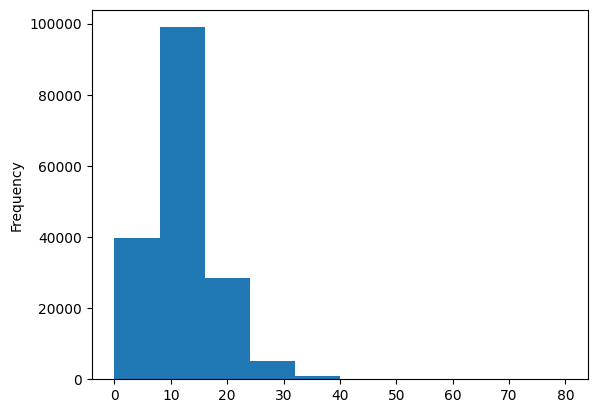

In [33]:
loan["open_acc"].plot(kind="hist")
loan["open_acc"]=loan["open_acc"].fillna(10)

In [34]:
loan["pub_rec"].value_counts()
loan["pub_rec"]=loan["pub_rec"].fillna(0)

In [35]:
loan["term"]=loan["term"].fillna(36)
loan["home_ownership"]=loan["home_ownership"].fillna("MORTGAGE")

In [36]:
loan['emp_length'] = loan['emp_length'].astype(float)

In [37]:
loan["grade"]=loan["grade"].fillna("B")
loan["emp_length"]=loan["emp_length"].fillna(loan["emp_length"].median())
loan["loan_status"]=loan["loan_status"].fillna("Current")
loan["verification_status"]=loan["verification_status"].fillna("Source Verified")
loan["pymnt_plan"]=loan["pymnt_plan"].fillna("n")
loan["purpose"]=loan["purpose"].fillna("debt_consolidation")
loan["addr_state"]=loan["addr_state"].fillna("CA")
loan["initial_list_status"]=loan["initial_list_status"].fillna("w")
loan["total_rec_late_fee"]=loan["total_rec_late_fee"].fillna(loan["total_rec_late_fee"].mean())
loan["recoveries"]=loan["recoveries"].fillna(loan["recoveries"].mean())
loan["collections_12_mths_ex_med"]=loan["collections_12_mths_ex_med"].fillna(0.0)
loan["application_type"]=loan["application_type"].fillna("Individual")
loan["acc_now_delinq"]=loan["acc_now_delinq"].fillna(0.0)
loan["mths_since_recent_inq"]=loan["mths_since_recent_inq"].fillna(loan["mths_since_recent_inq"].median())
loan["num_tl_120dpd_2m"]=loan["num_tl_120dpd_2m"].fillna(loan["num_tl_120dpd_2m"].median())
loan["hardship_flag"]=loan["hardship_flag"].fillna("N")
loan["debt_settlement_flag"]=loan["debt_settlement_flag"].fillna("N")
loan["pub_rec_bankruptcies"]=loan["pub_rec_bankruptcies"].fillna(loan["pub_rec_bankruptcies"].median())

In [38]:
loan=loan.fillna(0)

In [39]:
loan.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_util                    0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_rec_late_fee            0
recoveries                    0
last_pymnt_d                  0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll

In [40]:
loan.dtypes

loan_amnt                              int64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
emp_length                           float64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
purpose                               object
addr_state                            object
dti                                  float64
delinq_2yrs                          float64
inq_last_6mths                       float64
mths_since_last_delinq               float64
open_acc                             float64
pub_rec                              float64
revol_util                           float64
initial_list_status                   object
out_prncp 

In [41]:
loan['hardship_flag'].unique()

array(['N'], dtype=object)

In [42]:
loan = loan.drop('hardship_flag', axis = 1)

## Encoding 

In [43]:
loan=pd.get_dummies(loan,columns=["home_ownership","verification_status","issue_d","pymnt_plan","purpose","addr_state","initial_list_status","last_pymnt_d","application_type","debt_settlement_flag"],drop_first=True)
loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,out_prncp,out_prncp_inv,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2007-08-01 00:00:00,issue_d_2007-09-01 00:00:00,issue_d_2007-10-01 00:00:00,issue_d_2007-11-01 00:00:00,issue_d_2007-12-01 00:00:00,issue_d_2008-01-01 00:00:00,issue_d_2008-02-01 00:00:00,issue_d_2008-03-01 00:00:00,issue_d_2008-04-01 00:00:00,issue_d_2008-05-01 00:00:00,issue_d_2008-06-01 00:00:00,issue_d_2008-07-01 00:00:00,issue_d_2008-08-01 00:00:00,issue_d_2008-09-01 00:00:00,issue_d_2008-10-01 00:00:00,issue_d_2008-11-01 00:00:00,issue_d_2008-12-01 00:00:00,issue_d_2009-01-01 00:00:00,issue_d_2009-02-01 00:00:00,issue_d_2009-03-01 00:00:00,issue_d_2009-04-01 00:00:00,issue_d_2009-05-01 00:00:00,issue_d_2009-06-01 00:00:00,issue_d_2009-07-01 00:00:00,issue_d_2009-08-01 00:00:00,issue_d_2009-09-01 00:00:00,issue_d_2009-10-01 00:00:00,issue_d_2009-11-01 00:00:00,issue_d_2009-12-01 00:00:00,issue_d_2010-01-01 00:00:00,issue_d_2010-02-01 00:00:00,issue_d_2010-03-01 00:00:00,issue_d_2010-04-01 00:00:00,issue_d_2010-05-01 00:00:00,issue_d_2010-06-01 00:00:00,issue_d_2010-07-01 00:00:00,issue_d_2010-08-01 00:00:00,issue_d_2010-09-01 00:00:00,issue_d_2010-10-01 00:00:00,issue_d_2010-11-01 00:00:00,issue_d_2010-12-01 00:00:00,issue_d_2011-01-01 00:00:00,issue_d_2011-02-01 00:00:00,issue_d_2011-03-01 00:00:00,issue_d_2011-04-01 00:00:00,issue_d_2011-05-01 00:00:00,issue_d_2011-06-01 00:00:00,issue_d_2011-07-01 00:00:00,issue_d_2011-08-01 00:00:00,issue_d_2011-09-01 00:00:00,issue_d_2011-10-01 00:00:00,issue_d_2011-11-01 00:00:00,issue_d_2011-12-01 00:00:00,issue_d_2012-01-01 00:00:00,issue_d_2012-02-01 00:00:00,issue_d_2012-03-01 00:00:00,issue_d_2012-04-01 00:00:00,issue_d_2012-05-01 00:00:00,issue_d_2012-06-01 00:00:00,issue_d_2012-07-01 00:00:00,issue_d_2012-08-01 00:00:00,issue_d_2012-09-01 00:00:00,issue_d_2012-10-01 00:00:00,issue_d_2012-11-01 00:00:00,issue_d_2012-12-01 00:00:00,issue_d_2013-01-01 00:00:00,issue_d_2013-02-01 00:00:00,issue_d_2013-03-01 00:00:00,issue_d_2013-04-01 00:00:00,issue_d_2013-05-01 00:00:00,issue_d_2013-06-01 00:00:00,issue_d_2013-07-01 00:00:00,issue_d_2013-08-01 00:00:00,issue_d_2013-09-01 00:00:00,issue_d_2013-10-01 00:00:00,issue_d_2013-11-01 00:00:00,issue_d_2013-12-01 00:00:00,issue_d_2014-01-01 00:00:00,issue_d_2014-02-01 00:00:00,issue_d_2014-03-01 00:00:00,issue_d_2014-04-01 00:00:00,issue_d_2014-05-01 00:00:00,issue_d_2014-06-01 00:00:00,issue_d_2014-07-01 00:00:00,issue_d_2014-08-01 00:00:00,issue_d_2014-09-01 00:00:00,issue_d_2014-10-01 00:00:00,issue_d_2014-11-01 00:00:00,issue_d_2014-12-01 00:00:00,issue_d_2015-01-01 00:00:00,issue_d_2015-02-01 00:00:00,issue_d_2015-03-01 00:00:00,issue_d_2015-04-01 00:00:00,issue_d_2015-05-01 00:00:00,issue_d_2015-06-01 00:00:00,issue_d_2015-07-01 00:00:00,issue_d_2015-08-01 00:00:00,issue_d_2015-09-01 00:00:00,issue_d_2015-10-01 00:00:00,issue_d_2015-11-01 00:00:00,issue_d_2015-12-01 00:00:00,issue_d_2016-01-01 00:00:00,issue_d_2016-02-01 00:00:00,issue_d_2016-03-01 00:00:00,issue_d_2016-04-01 00:00:00,issue_d_2016-05-01 00:00:00,issue_d_2016-06-01 00:00:00,issue_d_2016-07-01 00:00:00,issue_d_2016-08-01 00:00:00,issue_d_2016-09-01 00:00:00,issue_d_2016-10-01 00:00:00,issue_d_2016-11-01 00:00:00,issue_d_2016-12-01 00:00:00,issue_d_2017-01-01 00:00:00,is

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
loan["grade"]=le.fit_transform(loan["grade"])
loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,out_prncp,out_prncp_inv,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2007-08-01 00:00:00,issue_d_2007-09-01 00:00:00,issue_d_2007-10-01 00:00:00,issue_d_2007-11-01 00:00:00,issue_d_2007-12-01 00:00:00,issue_d_2008-01-01 00:00:00,issue_d_2008-02-01 00:00:00,issue_d_2008-03-01 00:00:00,issue_d_2008-04-01 00:00:00,issue_d_2008-05-01 00:00:00,issue_d_2008-06-01 00:00:00,issue_d_2008-07-01 00:00:00,issue_d_2008-08-01 00:00:00,issue_d_2008-09-01 00:00:00,issue_d_2008-10-01 00:00:00,issue_d_2008-11-01 00:00:00,issue_d_2008-12-01 00:00:00,issue_d_2009-01-01 00:00:00,issue_d_2009-02-01 00:00:00,issue_d_2009-03-01 00:00:00,issue_d_2009-04-01 00:00:00,issue_d_2009-05-01 00:00:00,issue_d_2009-06-01 00:00:00,issue_d_2009-07-01 00:00:00,issue_d_2009-08-01 00:00:00,issue_d_2009-09-01 00:00:00,issue_d_2009-10-01 00:00:00,issue_d_2009-11-01 00:00:00,issue_d_2009-12-01 00:00:00,issue_d_2010-01-01 00:00:00,issue_d_2010-02-01 00:00:00,issue_d_2010-03-01 00:00:00,issue_d_2010-04-01 00:00:00,issue_d_2010-05-01 00:00:00,issue_d_2010-06-01 00:00:00,issue_d_2010-07-01 00:00:00,issue_d_2010-08-01 00:00:00,issue_d_2010-09-01 00:00:00,issue_d_2010-10-01 00:00:00,issue_d_2010-11-01 00:00:00,issue_d_2010-12-01 00:00:00,issue_d_2011-01-01 00:00:00,issue_d_2011-02-01 00:00:00,issue_d_2011-03-01 00:00:00,issue_d_2011-04-01 00:00:00,issue_d_2011-05-01 00:00:00,issue_d_2011-06-01 00:00:00,issue_d_2011-07-01 00:00:00,issue_d_2011-08-01 00:00:00,issue_d_2011-09-01 00:00:00,issue_d_2011-10-01 00:00:00,issue_d_2011-11-01 00:00:00,issue_d_2011-12-01 00:00:00,issue_d_2012-01-01 00:00:00,issue_d_2012-02-01 00:00:00,issue_d_2012-03-01 00:00:00,issue_d_2012-04-01 00:00:00,issue_d_2012-05-01 00:00:00,issue_d_2012-06-01 00:00:00,issue_d_2012-07-01 00:00:00,issue_d_2012-08-01 00:00:00,issue_d_2012-09-01 00:00:00,issue_d_2012-10-01 00:00:00,issue_d_2012-11-01 00:00:00,issue_d_2012-12-01 00:00:00,issue_d_2013-01-01 00:00:00,issue_d_2013-02-01 00:00:00,issue_d_2013-03-01 00:00:00,issue_d_2013-04-01 00:00:00,issue_d_2013-05-01 00:00:00,issue_d_2013-06-01 00:00:00,issue_d_2013-07-01 00:00:00,issue_d_2013-08-01 00:00:00,issue_d_2013-09-01 00:00:00,issue_d_2013-10-01 00:00:00,issue_d_2013-11-01 00:00:00,issue_d_2013-12-01 00:00:00,issue_d_2014-01-01 00:00:00,issue_d_2014-02-01 00:00:00,issue_d_2014-03-01 00:00:00,issue_d_2014-04-01 00:00:00,issue_d_2014-05-01 00:00:00,issue_d_2014-06-01 00:00:00,issue_d_2014-07-01 00:00:00,issue_d_2014-08-01 00:00:00,issue_d_2014-09-01 00:00:00,issue_d_2014-10-01 00:00:00,issue_d_2014-11-01 00:00:00,issue_d_2014-12-01 00:00:00,issue_d_2015-01-01 00:00:00,issue_d_2015-02-01 00:00:00,issue_d_2015-03-01 00:00:00,issue_d_2015-04-01 00:00:00,issue_d_2015-05-01 00:00:00,issue_d_2015-06-01 00:00:00,issue_d_2015-07-01 00:00:00,issue_d_2015-08-01 00:00:00,issue_d_2015-09-01 00:00:00,issue_d_2015-10-01 00:00:00,issue_d_2015-11-01 00:00:00,issue_d_2015-12-01 00:00:00,issue_d_2016-01-01 00:00:00,issue_d_2016-02-01 00:00:00,issue_d_2016-03-01 00:00:00,issue_d_2016-04-01 00:00:00,issue_d_2016-05-01 00:00:00,issue_d_2016-06-01 00:00:00,issue_d_2016-07-01 00:00:00,issue_d_2016-08-01 00:00:00,issue_d_2016-09-01 00:00:00,issue_d_2016-10-01 00:00:00,issue_d_2016-11-01 00:00:00,issue_d_2016-12-01 00:00:00,issue_d_2017-01-01 00:00:00,is

In [47]:
loan['loan_status'] = loan['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,out_prncp,out_prncp_inv,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2007-08-01 00:00:00,issue_d_2007-09-01 00:00:00,issue_d_2007-10-01 00:00:00,issue_d_2007-11-01 00:00:00,issue_d_2007-12-01 00:00:00,issue_d_2008-01-01 00:00:00,issue_d_2008-02-01 00:00:00,issue_d_2008-03-01 00:00:00,issue_d_2008-04-01 00:00:00,issue_d_2008-05-01 00:00:00,issue_d_2008-06-01 00:00:00,issue_d_2008-07-01 00:00:00,issue_d_2008-08-01 00:00:00,issue_d_2008-09-01 00:00:00,issue_d_2008-10-01 00:00:00,issue_d_2008-11-01 00:00:00,issue_d_2008-12-01 00:00:00,issue_d_2009-01-01 00:00:00,issue_d_2009-02-01 00:00:00,issue_d_2009-03-01 00:00:00,issue_d_2009-04-01 00:00:00,issue_d_2009-05-01 00:00:00,issue_d_2009-06-01 00:00:00,issue_d_2009-07-01 00:00:00,issue_d_2009-08-01 00:00:00,issue_d_2009-09-01 00:00:00,issue_d_2009-10-01 00:00:00,issue_d_2009-11-01 00:00:00,issue_d_2009-12-01 00:00:00,issue_d_2010-01-01 00:00:00,issue_d_2010-02-01 00:00:00,issue_d_2010-03-01 00:00:00,issue_d_2010-04-01 00:00:00,issue_d_2010-05-01 00:00:00,issue_d_2010-06-01 00:00:00,issue_d_2010-07-01 00:00:00,issue_d_2010-08-01 00:00:00,issue_d_2010-09-01 00:00:00,issue_d_2010-10-01 00:00:00,issue_d_2010-11-01 00:00:00,issue_d_2010-12-01 00:00:00,issue_d_2011-01-01 00:00:00,issue_d_2011-02-01 00:00:00,issue_d_2011-03-01 00:00:00,issue_d_2011-04-01 00:00:00,issue_d_2011-05-01 00:00:00,issue_d_2011-06-01 00:00:00,issue_d_2011-07-01 00:00:00,issue_d_2011-08-01 00:00:00,issue_d_2011-09-01 00:00:00,issue_d_2011-10-01 00:00:00,issue_d_2011-11-01 00:00:00,issue_d_2011-12-01 00:00:00,issue_d_2012-01-01 00:00:00,issue_d_2012-02-01 00:00:00,issue_d_2012-03-01 00:00:00,issue_d_2012-04-01 00:00:00,issue_d_2012-05-01 00:00:00,issue_d_2012-06-01 00:00:00,issue_d_2012-07-01 00:00:00,issue_d_2012-08-01 00:00:00,issue_d_2012-09-01 00:00:00,issue_d_2012-10-01 00:00:00,issue_d_2012-11-01 00:00:00,issue_d_2012-12-01 00:00:00,issue_d_2013-01-01 00:00:00,issue_d_2013-02-01 00:00:00,issue_d_2013-03-01 00:00:00,issue_d_2013-04-01 00:00:00,issue_d_2013-05-01 00:00:00,issue_d_2013-06-01 00:00:00,issue_d_2013-07-01 00:00:00,issue_d_2013-08-01 00:00:00,issue_d_2013-09-01 00:00:00,issue_d_2013-10-01 00:00:00,issue_d_2013-11-01 00:00:00,issue_d_2013-12-01 00:00:00,issue_d_2014-01-01 00:00:00,issue_d_2014-02-01 00:00:00,issue_d_2014-03-01 00:00:00,issue_d_2014-04-01 00:00:00,issue_d_2014-05-01 00:00:00,issue_d_2014-06-01 00:00:00,issue_d_2014-07-01 00:00:00,issue_d_2014-08-01 00:00:00,issue_d_2014-09-01 00:00:00,issue_d_2014-10-01 00:00:00,issue_d_2014-11-01 00:00:00,issue_d_2014-12-01 00:00:00,issue_d_2015-01-01 00:00:00,issue_d_2015-02-01 00:00:00,issue_d_2015-03-01 00:00:00,issue_d_2015-04-01 00:00:00,issue_d_2015-05-01 00:00:00,issue_d_2015-06-01 00:00:00,issue_d_2015-07-01 00:00:00,issue_d_2015-08-01 00:00:00,issue_d_2015-09-01 00:00:00,issue_d_2015-10-01 00:00:00,issue_d_2015-11-01 00:00:00,issue_d_2015-12-01 00:00:00,issue_d_2016-01-01 00:00:00,issue_d_2016-02-01 00:00:00,issue_d_2016-03-01 00:00:00,issue_d_2016-04-01 00:00:00,issue_d_2016-05-01 00:00:00,issue_d_2016-06-01 00:00:00,issue_d_2016-07-01 00:00:00,issue_d_2016-08-01 00:00:00,issue_d_2016-09-01 00:00:00,issue_d_2016-10-01 00:00:00,issue_d_2016-11-01 00:00:00,issue_d_2016-12-01 00:00:00,issue_d_2017-01-01 00:00:00,is

## Train-test split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = loan.drop('loan_status', axis=1)
y = loan['loan_status']

In [50]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,172993.0,14384.138520,8691.633769,8.000000e+02,7950.000000,12000.000000,20000.000000,4.000000e+04
int_rate,172993.0,13.272604,4.760899,5.310000e+00,9.750000,12.790000,16.010000,3.099000e+01
installment,172993.0,437.115155,260.905369,1.987000e+01,248.100000,373.940000,578.680000,1.719830e+03
grade,172993.0,1.755088,1.296449,0.000000e+00,1.000000,2.000000,3.000000,6.000000e+00
emp_length,172993.0,6.041522,3.460960,1.000000e+00,3.000000,6.000000,10.000000,1.000000e+01
annual_inc,172993.0,76122.272641,71207.876655,0.000000e+00,45420.000000,65000.000000,90000.000000,8.900060e+06
dti,172993.0,18.272893,10.285126,-1.000000e+00,11.840000,17.630000,24.070000,9.990000e+02
delinq_2yrs,172993.0,0.315862,0.868128,0.000000e+00,0.000000,0.000000,0.000000,2.200000e+01
inq_last_6mths,172993.0,0.658871,0.939213,0.000000e+00,0.000000,0.000000,1.000000,8.000000e+00
mths_since_last_delinq,172993.0,16.990930,23.054755,0.000000e+00,0.000000,0.000000,31.000000,1.880000e+02


In [51]:
feature=X[["loan_amnt","int_rate","annual_inc","dti","delinq_2yrs","open_acc","pub_rec","bc_open_to_buy","revol_util","out_prncp","total_rec_late_fee","recoveries","tot_cur_bal","tot_coll_amt","total_bal_il","delinq_amnt"]]

In [52]:
feature_scale=list(feature.columns)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X[feature_scale]=ss.fit_transform(feature)

In [53]:
X.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,out_prncp,out_prncp_inv,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2007-08-01 00:00:00,issue_d_2007-09-01 00:00:00,issue_d_2007-10-01 00:00:00,issue_d_2007-11-01 00:00:00,issue_d_2007-12-01 00:00:00,issue_d_2008-01-01 00:00:00,issue_d_2008-02-01 00:00:00,issue_d_2008-03-01 00:00:00,issue_d_2008-04-01 00:00:00,issue_d_2008-05-01 00:00:00,issue_d_2008-06-01 00:00:00,issue_d_2008-07-01 00:00:00,issue_d_2008-08-01 00:00:00,issue_d_2008-09-01 00:00:00,issue_d_2008-10-01 00:00:00,issue_d_2008-11-01 00:00:00,issue_d_2008-12-01 00:00:00,issue_d_2009-01-01 00:00:00,issue_d_2009-02-01 00:00:00,issue_d_2009-03-01 00:00:00,issue_d_2009-04-01 00:00:00,issue_d_2009-05-01 00:00:00,issue_d_2009-06-01 00:00:00,issue_d_2009-07-01 00:00:00,issue_d_2009-08-01 00:00:00,issue_d_2009-09-01 00:00:00,issue_d_2009-10-01 00:00:00,issue_d_2009-11-01 00:00:00,issue_d_2009-12-01 00:00:00,issue_d_2010-01-01 00:00:00,issue_d_2010-02-01 00:00:00,issue_d_2010-03-01 00:00:00,issue_d_2010-04-01 00:00:00,issue_d_2010-05-01 00:00:00,issue_d_2010-06-01 00:00:00,issue_d_2010-07-01 00:00:00,issue_d_2010-08-01 00:00:00,issue_d_2010-09-01 00:00:00,issue_d_2010-10-01 00:00:00,issue_d_2010-11-01 00:00:00,issue_d_2010-12-01 00:00:00,issue_d_2011-01-01 00:00:00,issue_d_2011-02-01 00:00:00,issue_d_2011-03-01 00:00:00,issue_d_2011-04-01 00:00:00,issue_d_2011-05-01 00:00:00,issue_d_2011-06-01 00:00:00,issue_d_2011-07-01 00:00:00,issue_d_2011-08-01 00:00:00,issue_d_2011-09-01 00:00:00,issue_d_2011-10-01 00:00:00,issue_d_2011-11-01 00:00:00,issue_d_2011-12-01 00:00:00,issue_d_2012-01-01 00:00:00,issue_d_2012-02-01 00:00:00,issue_d_2012-03-01 00:00:00,issue_d_2012-04-01 00:00:00,issue_d_2012-05-01 00:00:00,issue_d_2012-06-01 00:00:00,issue_d_2012-07-01 00:00:00,issue_d_2012-08-01 00:00:00,issue_d_2012-09-01 00:00:00,issue_d_2012-10-01 00:00:00,issue_d_2012-11-01 00:00:00,issue_d_2012-12-01 00:00:00,issue_d_2013-01-01 00:00:00,issue_d_2013-02-01 00:00:00,issue_d_2013-03-01 00:00:00,issue_d_2013-04-01 00:00:00,issue_d_2013-05-01 00:00:00,issue_d_2013-06-01 00:00:00,issue_d_2013-07-01 00:00:00,issue_d_2013-08-01 00:00:00,issue_d_2013-09-01 00:00:00,issue_d_2013-10-01 00:00:00,issue_d_2013-11-01 00:00:00,issue_d_2013-12-01 00:00:00,issue_d_2014-01-01 00:00:00,issue_d_2014-02-01 00:00:00,issue_d_2014-03-01 00:00:00,issue_d_2014-04-01 00:00:00,issue_d_2014-05-01 00:00:00,issue_d_2014-06-01 00:00:00,issue_d_2014-07-01 00:00:00,issue_d_2014-08-01 00:00:00,issue_d_2014-09-01 00:00:00,issue_d_2014-10-01 00:00:00,issue_d_2014-11-01 00:00:00,issue_d_2014-12-01 00:00:00,issue_d_2015-01-01 00:00:00,issue_d_2015-02-01 00:00:00,issue_d_2015-03-01 00:00:00,issue_d_2015-04-01 00:00:00,issue_d_2015-05-01 00:00:00,issue_d_2015-06-01 00:00:00,issue_d_2015-07-01 00:00:00,issue_d_2015-08-01 00:00:00,issue_d_2015-09-01 00:00:00,issue_d_2015-10-01 00:00:00,issue_d_2015-11-01 00:00:00,issue_d_2015-12-01 00:00:00,issue_d_2016-01-01 00:00:00,issue_d_2016-02-01 00:00:00,issue_d_2016-03-01 00:00:00,issue_d_2016-04-01 00:00:00,issue_d_2016-05-01 00:00:00,issue_d_2016-06-01 00:00:00,issue_d_2016-07-01 00:00:00,issue_d_2016-08-01 00:00:00,issue_d_2016-09-01 00:00:00,issue_d_2016-10-01 00:00:00,issue_d_2016-11-01 00:00:00,issue_d_2016-12-01 00:00:00,issue_d_2017-01-01 00:00:00,issue_d_2017-0

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Building a base model

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_predict_test=log_model.predict(X_test)

t=list(X_train.columns)

coef_df=pd.DataFrame(log_model.coef_,columns=t)
coef_df["intercept"]=log_model.intercept_


In [56]:
from sklearn import metrics

In [57]:
model_score= log_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict_test))

0.8859686307757524
[[ 6475  3881]
 [ 2037 39505]]


In [58]:
Accuracy_score=metrics.accuracy_score(y_test,y_predict_test)
Train_score=log_model.score(X_train, y_train)
Test_score=log_model.score(X_test,y_test)
cohen_kappa_score=metrics.cohen_kappa_score(y_predict_test,y_test)
AUC_score=round(metrics.roc_auc_score(y_test, y_predict_test),4)

print(f'Accuracy Score: {Accuracy_score}')
print(f'Train Score: {Train_score}')
print(f'Test Score: {Test_score}')
print(f'Cohen Kappa Score: {cohen_kappa_score}')
print(f'AUC Score: {AUC_score}')

Accuracy Score: 0.8859686307757524
Train Score: 0.8867583302365911
Test Score: 0.8859686307757524
Cohen Kappa Score: 0.6174764144445812
AUC Score: 0.7881


In [59]:
Recall_score = metrics.recall_score(y_predict_test, y_test)
print(f'Recall score: {Recall_score}')

Recall score: 0.9105471811183331


In [60]:
F1_score = metrics.f1_score(y_predict_test, y_test)
print(f'F1 score: {F1_score}')

F1 score: 0.9303174453654861
